In [65]:
%pip install pandas matplotlib

8844.88s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [143]:
test_filename = os.path.join(os.getcwd(), 'ds03/assets/Test_knight.csv')
test_df = pd.read_csv(test_filename)
train_filename = os.path.join(os.getcwd(), 'ds03/assets/Train_knight.csv')
train_df = pd.read_csv(train_filename)
train_df.set_index('knight')
train_df.head(5)

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,11.80,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.016380,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.17260,0.14490,0.05356,0.2779,0.08121,Sith
1,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.147900,0.094980,0.1582,0.05395,...,30.88,186.80,2398.0,0.1512,0.31500,0.53720,0.23880,0.2768,0.07615,Jedi
2,10.97,17.20,71.73,371.5,0.08915,0.11130,0.094570,0.036130,0.1489,0.06640,...,26.87,90.14,476.4,0.1391,0.40820,0.47790,0.15550,0.2540,0.09532,Sith
3,11.62,18.18,76.38,408.8,0.11750,0.14830,0.102000,0.055640,0.1957,0.07255,...,25.40,88.14,528.1,0.1780,0.28780,0.31860,0.14160,0.2660,0.09270,Sith
4,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,0.06343,...,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557,0.07613,Sith


In [ ]:
""" Find Highest and Lowest Correlation """
df = train_df.copy()
df['knight_num'] = df['knight'].map({'Jedi': 1, 'Sith': 0})
cor = df.corr(numeric_only=True)['knight_num']
print(cor.sort_values(ascending=False).head(5))
print('====')
print(cor.sort_values().head(5))

knight_num    1.000000
Empowered     0.793652
Prescience    0.790066
Stims         0.786797
Recovery      0.777633
Name: knight_num, dtype: float64
====
Survival        -0.043099
Deflection      -0.026489
Push            -0.019446
Midi-chlorien    0.008132
Mass             0.113185
Name: knight_num, dtype: float64


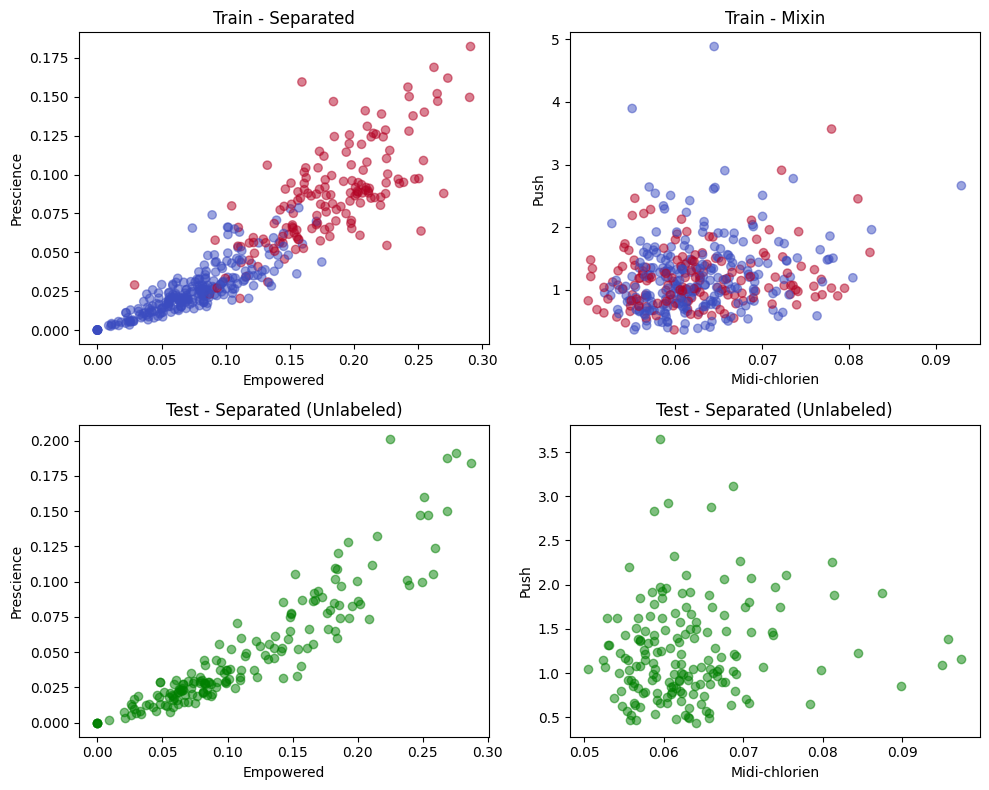

In [ ]:
# Map string to num
train_df['knight_num'] = train_df['knight'].map({'Jedi': 1, 'Sith': 0})

# Highest Correlation is 'Empowered' And 'Prescience'
separating_pair = ('Empowered', 'Prescience')
# Lowest Correlation is 'Midi-colorien' And 'Push' That nestest zero
mixing_pair = ('Midi-chlorien', 'Push')

### Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

### Seperating Cluster
# Train - separating
axs[0, 0].scatter(train_df[separating_pair[0]], train_df[separating_pair[1]], c=train_df['knight_num'], cmap='coolwarm', alpha=0.5, label='Train')
axs[0, 0].set_title('Train - Separated')
axs[0, 0].set_xlabel(separating_pair[0])
axs[0, 0].set_ylabel(separating_pair[1])

# Test - separated (no class)
axs[1, 0].scatter(test_df[separating_pair[0]], test_df[separating_pair[1]], color='green', alpha=0.5)
axs[1, 0].set_title('Test - Separated (Unlabeled)')
axs[1, 0].set_xlabel(separating_pair[0])
axs[1, 0].set_ylabel(separating_pair[1])

### Mixin Cluster
# Train - mixin
axs[0, 1].scatter(train_df[mixing_pair[0]], train_df[mixing_pair[1]], c=train_df['knight_num'], cmap='coolwarm', alpha=0.5, label='Train')
axs[0, 1].set_title('Train - Mixin')
axs[0, 1].set_xlabel(mixing_pair[0])
axs[0, 1].set_ylabel(mixing_pair[1])

# Test - Mixin (no class)
axs[1, 1].scatter(test_df[mixing_pair[0]], test_df[mixing_pair[1]], color='green', alpha=0.5)
axs[1, 1].set_title('Test - Separated (Unlabeled)')
axs[1, 1].set_xlabel(mixing_pair[0])
axs[1, 1].set_ylabel(mixing_pair[1])

plt.tight_layout()
plt.show()

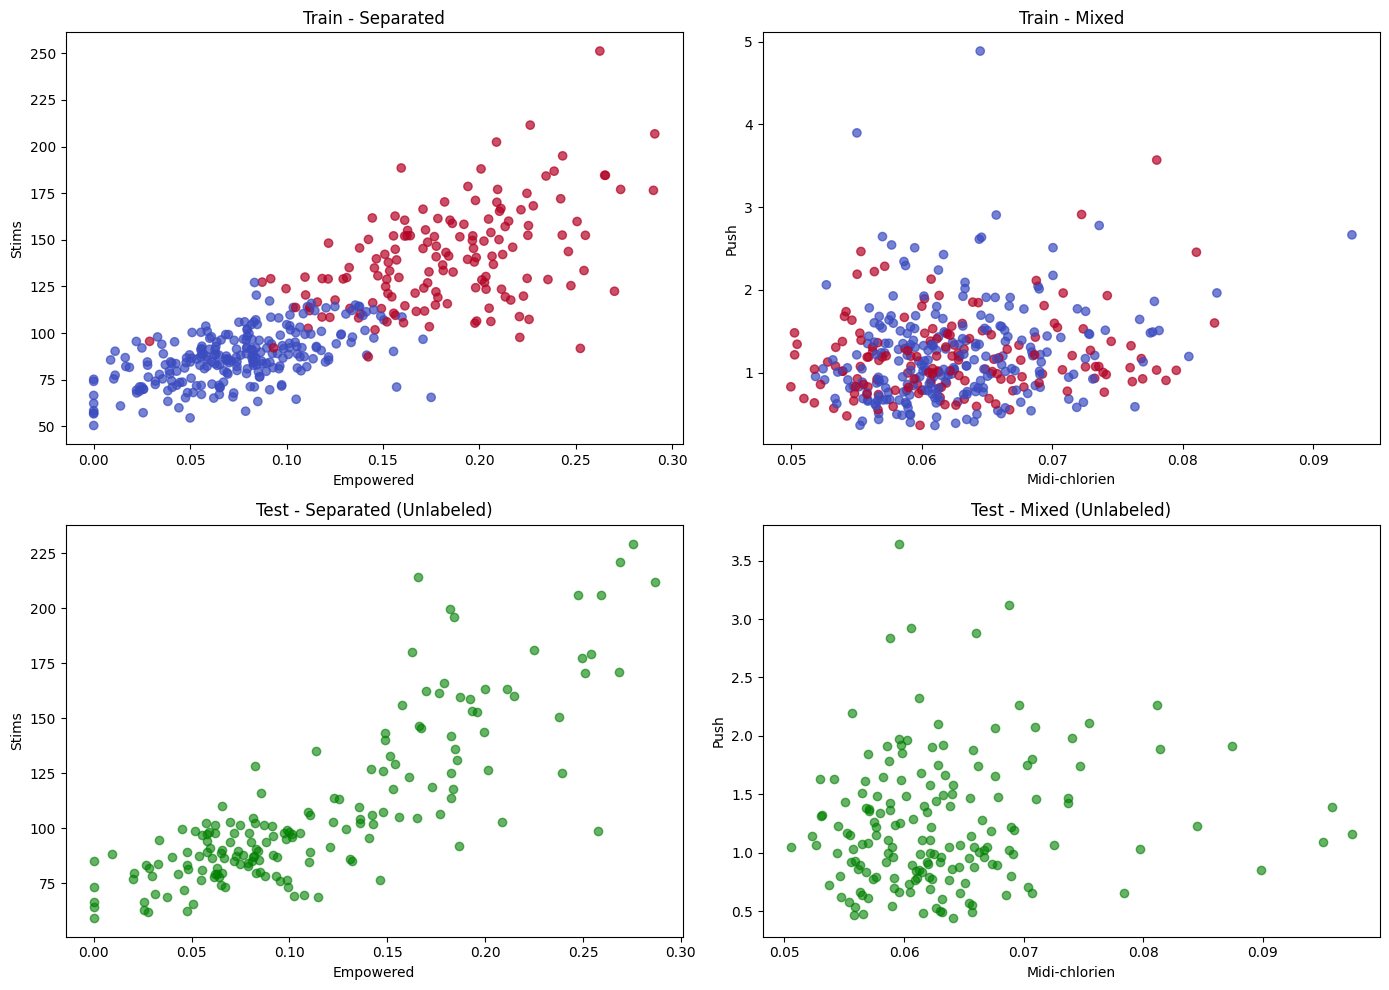

In [123]:
train = train_df.copy()
test = test_df.copy()
# Encode 'knight' for color grouping
train['knight_num'] = train['knight'].map({'Jedi': 1, 'Sith': 0})

# Define pairs
separating_pair = ('Empowered', 'Stims')
mixing_pair = ('Midi-chlorien', 'Push')

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Train - separating
axs[0, 0].scatter(train[separating_pair[0]], train[separating_pair[1]],
                  c=train['knight_num'], cmap='coolwarm', alpha=0.7, label='Train')
axs[0, 0].set_title('Train - Separated')
axs[0, 0].set_xlabel(separating_pair[0])
axs[0, 0].set_ylabel(separating_pair[1])

# Train - mixed
axs[0, 1].scatter(train[mixing_pair[0]], train[mixing_pair[1]],
                  c=train['knight_num'], cmap='coolwarm', alpha=0.7)
axs[0, 1].set_title('Train - Mixed')
axs[0, 1].set_xlabel(mixing_pair[0])
axs[0, 1].set_ylabel(mixing_pair[1])

# Test - separated (no class)
axs[1, 0].scatter(test[separating_pair[0]], test[separating_pair[1]],
                  color='green', alpha=0.6)
axs[1, 0].set_title('Test - Separated (Unlabeled)')
axs[1, 0].set_xlabel(separating_pair[0])
axs[1, 0].set_ylabel(separating_pair[1])

# Test - mixed (no class)
axs[1, 1].scatter(test[mixing_pair[0]], test[mixing_pair[1]],
                  color='green', alpha=0.6)
axs[1, 1].set_title('Test - Mixed (Unlabeled)')
axs[1, 1].set_xlabel(mixing_pair[0])
axs[1, 1].set_ylabel(mixing_pair[1])

plt.tight_layout()
plt.show()